1. Eksplorasi Awal dan Pra-pemrosesan

a. Analisis Distribusi Kelas Target

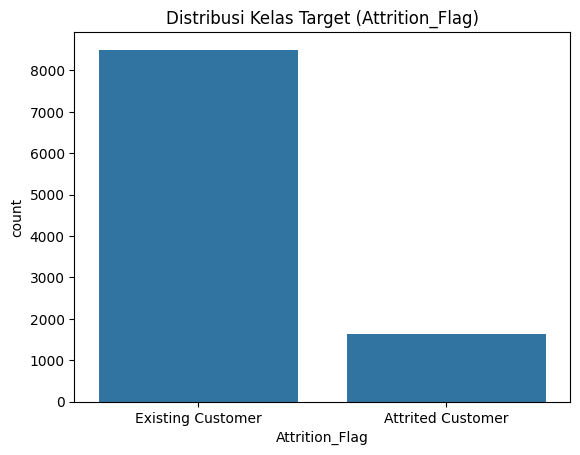

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Muat dataset
df = pd.read_csv("BankChurners.csv")

# Tampilkan beberapa data awal
df.head()

# Analisis distribusi kelas target
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Distribusi Kelas Target (Attrition_Flag)')
plt.show()

# Menghitung jumlah masing-masing kelas
print(df['Attrition_Flag'].value_counts())


b. Normalisasi Fitur Numerik

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Pilih fitur numerik yang perlu dinormalisasi
numeric_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi data numerik
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Periksa hasil normalisasi
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,0.404255,M,0.6,High School,Married,$60K - $80K,Blue,0.604651,...,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061,0.000093,0.99991
1,818770008,Existing Customer,0.489362,F,1.0,Graduate,Single,Less than $40K,Blue,0.720930,...,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105,0.000057,0.99994
2,713982108,Existing Customer,0.531915,M,0.6,Graduate,Married,$80K - $120K,Blue,0.534884,...,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000,0.000021,0.99998
3,769911858,Existing Customer,0.297872,F,0.8,High School,Unknown,Less than $40K,Blue,0.488372,...,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761,0.000134,0.99987
4,709106358,Existing Customer,0.297872,M,0.6,Uneducated,Married,$60K - $80K,Blue,0.186047,...,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000,0.000022,0.99998


2. Data Balancing

a. Oversampling dengan SMOTE

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
       'Attrition_Flag_Existing Customer', 'Gender_M',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $6

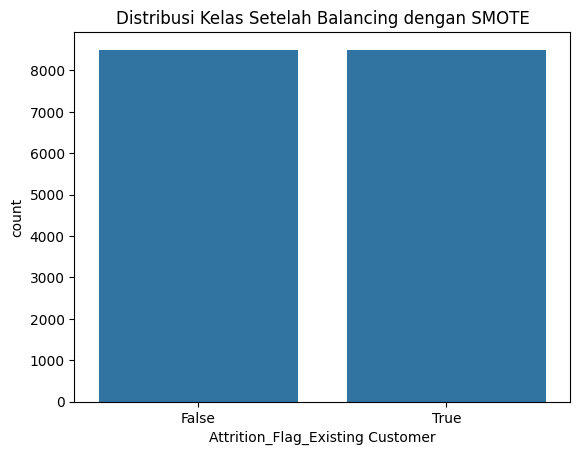

In [22]:
# Menggunakan One-Hot Encoding untuk kolom kategorikal
df_encoded = pd.get_dummies(df, drop_first=True)

# Periksa nama kolom hasil encoding
print(df_encoded.columns)

# Pisahkan kembali fitur dan target setelah encoding
X = df_encoded.drop('Attrition_Flag_Existing Customer', axis=1)  # Sesuaikan dengan nama kolom hasil encoding
y = df_encoded['Attrition_Flag_Existing Customer']  # Sesuaikan dengan nama kolom hasil encoding

# Terapkan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Tampilkan perbandingan jumlah data sebelum dan sesudah balancing
print(f"Jumlah data sebelum balancing: {y.value_counts()}")
print(f"Jumlah data setelah balancing: {y_res.value_counts()}")

# Visualisasi distribusi kelas setelah balancing
sns.countplot(x=y_res)
plt.title('Distribusi Kelas Setelah Balancing dengan SMOTE')
plt.show()


Jumlah data sebelum balancing: Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Jumlah data setelah balancing: Attrition_Flag
Existing Customer    8500
Attrited Customer    8500
Name: count, dtype: int64


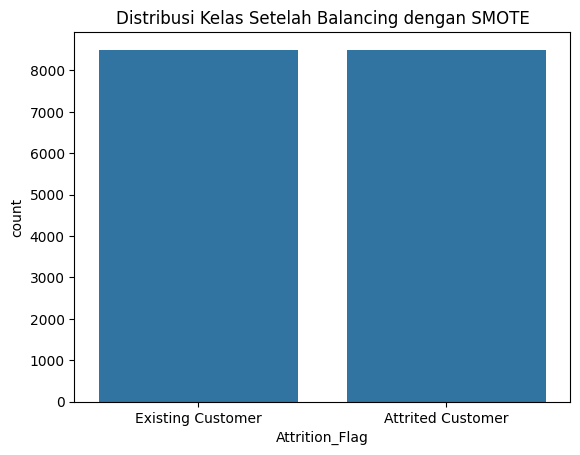

In [17]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Lakukan Label Encoding pada kolom kategorikal
df['Gender'] = le.fit_transform(df['Gender'])
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['Income_Category'] = le.fit_transform(df['Income_Category'])
df['Card_Category'] = le.fit_transform(df['Card_Category'])

# Pisahkan kembali fitur dan target
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# Terapkan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Tampilkan perbandingan jumlah data sebelum dan sesudah balancing
print(f"Jumlah data sebelum balancing: {y.value_counts()}")
print(f"Jumlah data setelah balancing: {y_res.value_counts()}")

# Visualisasi distribusi kelas setelah balancing
sns.countplot(x=y_res)
plt.title('Distribusi Kelas Setelah Balancing dengan SMOTE')
plt.show()


b. Alternatif: Undersampling

Jumlah data sebelum balancing: Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Jumlah data setelah balancing: Attrition_Flag
Attrited Customer    1627
Existing Customer    1627
Name: count, dtype: int64


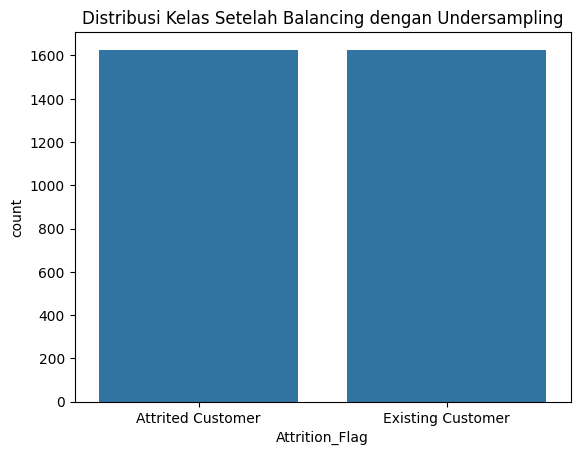

In [18]:
from imblearn.under_sampling import RandomUnderSampler

# Terapkan RandomUndersampling
undersample = RandomUnderSampler(random_state=42)
X_res, y_res = undersample.fit_resample(X, y)

# Tampilkan perbandingan jumlah data sebelum dan sesudah balancing
print(f"Jumlah data sebelum balancing: {y.value_counts()}")
print(f"Jumlah data setelah balancing: {y_res.value_counts()}")

# Visualisasi distribusi kelas setelah balancing
sns.countplot(x=y_res)
plt.title('Distribusi Kelas Setelah Balancing dengan Undersampling')
plt.show()


3. Data Splitting

Ukuran X_train: (13600, 35)
Ukuran X_test: (3400, 35)


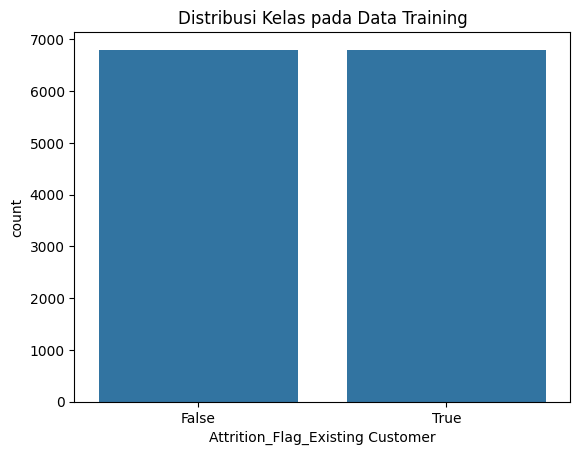

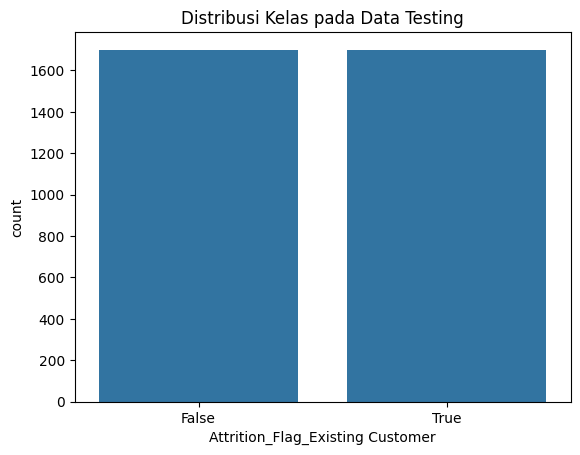

In [23]:
# Bagi data menjadi train dan test (80% untuk training, 20% untuk testing)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Periksa ukuran data train dan test
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")

# Visualisasi distribusi kelas setelah splitting
sns.countplot(x=y_train)
plt.title('Distribusi Kelas pada Data Training')
plt.show()

sns.countplot(x=y_test)
plt.title('Distribusi Kelas pada Data Testing')
plt.show()
